## Model a log normal distribution of expected costs

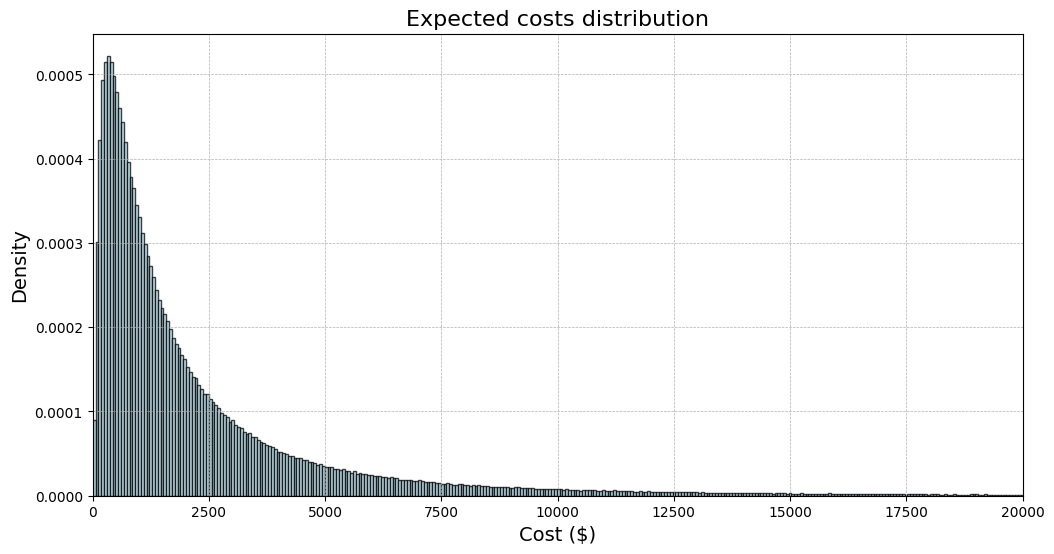

Calculated mean: 2596.50
Calculated median: 1299.72
Calculated sigma: 1.1774
Calculated mu: 7.1701
99th percentile: 19973.38
95th percentile: 9037.70
90th percentile: 5884.97
70th percentile: 2413.39
50th percentile: 1299.72


In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Set desired values
mean_value = 2600  # Target mean
mean_to_median_ratio = 2  # Target ratio of mean to median

# Step 2: Calculate sigma based on mean to median ratio
sigma = np.sqrt(2 * np.log(mean_to_median_ratio))

# Step 3: Calculate mu based on the desired mean
mu = np.log(mean_value) - 0.5 * sigma**2

# Step 4: Generate log-normal distribution
num_samples = 1000000  # Number of samples to generate
log_normal_samples = np.random.lognormal(mean=mu, sigma=sigma, size=num_samples)

# Step 5: Create the histogram 
plt.figure(figsize=(12, 6))
n, bins, patches = plt.hist(log_normal_samples, bins=10000, alpha=0.75, color='lightblue', edgecolor='black', density=True)

# Add titles and labels
plt.title('Expected costs distribution', fontsize=16)
plt.xlabel('Cost ($)', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Add grid for visual clarity
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Set x-axis limits to make the graph more focused
plt.xlim([0, 20000])

# Display the improved plot
plt.show()

# Step 6: Print out statistics and percentiles
print(f"Calculated mean: {np.mean(log_normal_samples):.2f}")
print(f"Calculated median: {np.median(log_normal_samples):.2f}")
print(f"Calculated sigma: {sigma:.4f}")
print(f"Calculated mu: {mu:.4f}")

# Step 7: Calculate and print specified percentiles
percentiles = [99, 95, 90, 70, 50]
percentile_values = np.percentile(log_normal_samples, percentiles)

for p, value in zip(percentiles, percentile_values):
    print(f"{p}th percentile: {value:.2f}")


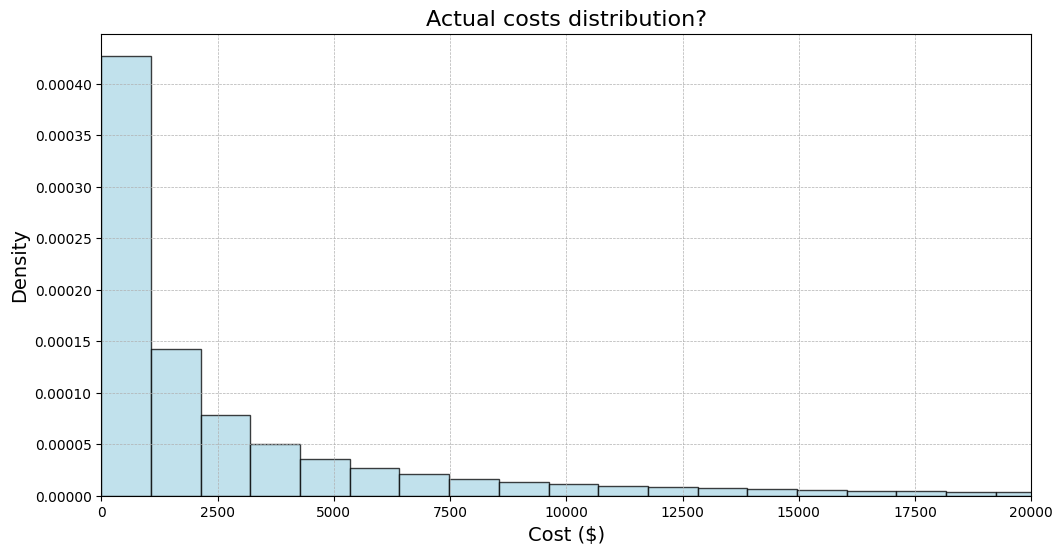

Calculated mean: 6585.59
Calculated median: 1303.86
Calculated sigma: 1.7941
Calculated mu: 7.1701
99th percentile: 85319.29
95th percentile: 24926.68
90th percentile: 13021.02
70th percentile: 3337.64
50th percentile: 1303.86


In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Set desired values
mean_value = 6500  # Target mean
mean_to_median_ratio = 5  # Target ratio of mean to median

# Step 2: Calculate sigma based on mean to median ratio
sigma = np.sqrt(2 * np.log(mean_to_median_ratio))

# Step 3: Calculate mu based on the desired mean
mu = np.log(mean_value) - 0.5 * sigma**2

# Step 4: Generate log-normal distribution
num_samples = 1000000  # Number of samples to generate
log_normal_samples = np.random.lognormal(mean=mu, sigma=sigma, size=num_samples)

# Step 5: Create the histogram 
plt.figure(figsize=(12, 6))
n, bins, patches = plt.hist(log_normal_samples, bins=20000, alpha=0.75, color='lightblue', edgecolor='black', density=True)

# Add titles and labels
plt.title('Actual costs distribution?', fontsize=16)
plt.xlabel('Cost ($)', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Add grid for visual clarity
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Set x-axis limits to make the graph more focused
plt.xlim([0, 20000])

# Display the improved plot
plt.show()

# Step 6: Print out statistics and percentiles
print(f"Calculated mean: {np.mean(log_normal_samples):.2f}")
print(f"Calculated median: {np.median(log_normal_samples):.2f}")
print(f"Calculated sigma: {sigma:.4f}")
print(f"Calculated mu: {mu:.4f}")

# Step 7: Calculate and print specified percentiles
percentiles = [99, 95, 90, 70, 50]
percentile_values = np.percentile(log_normal_samples, percentiles)

for p, value in zip(percentiles, percentile_values):
    print(f"{p}th percentile: {value:.2f}")


### 1. Create a log-normal distribution scaled from 0-100 to be probabilities that a health event will occur

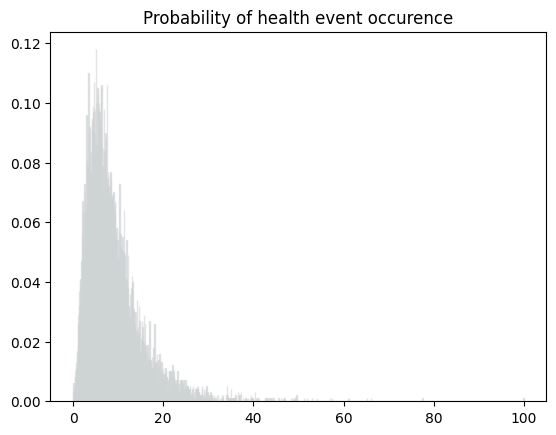

In [183]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define parameters for the log-normal distribution
mu = 0  # Mean of the underlying normal distribution (doesn't affect the scaled distribution)
sigma = .6  # Standard deviation of the underlying normal distribution (use this to shift scaled distribution, lower numbers shifts the distribution higher)
size = 10000  # Number of samples

# Step 2: Generate samples from a log-normal distribution
lognormal_samples = np.random.lognormal(mean=mu, sigma=sigma, size=size)

# Step 3: Scale and shift the distribution to range from 0 to 100
lognormal_min = lognormal_samples.min()
lognormal_max = lognormal_samples.max()

# Scale to range [0, 100]
lognormal_occurence_samples = 100 * (lognormal_samples - lognormal_min) / (lognormal_max - lognormal_min)

# Step 4: Plot the distribution to visualize
plt.hist(lognormal_occurence_samples, bins=1000, density=True, alpha=0.6, color='lightblue', edgecolor="lightgray")
plt.title("Probability of health event occurence")
plt.show()

### 2. Create a log-normal distribution to describe the results of each individual health event

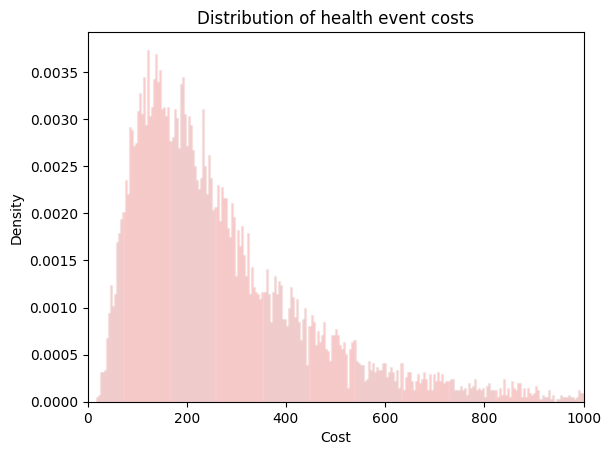

In [213]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define parameters for the log-normal distribution (cost)
mu_cost = 5.4  # Increase the mean to shift the distribution to higher values
sigma_cost = .7  # Standard deviation, higher values mean more spread
size = 10000  # Number of samples

# Step 2: Generate samples from a log-normal distribution (costs)
lognormal_cost_samples = np.random.lognormal(mean=mu_cost, sigma=sigma_cost, size=size)

# Step 3: Plot the distribution to visualize (no need to scale manually)
plt.hist(lognormal_cost_samples, bins=1000, density=True, alpha=0.2, color='red', edgecolor="lightgray")
plt.title("Distribution of health event costs")
plt.xlabel("Cost")
plt.ylabel("Density")
plt.xlim(0, 1000)  # Limit x-axis range to better see distribution
plt.show()


### Create a random walk simulation. 
Each simulation takes a random starting point from the step 1 probability distribution and each step calculates if a health event occurs. If it does occur, it takes the result from a random selection from the step 2 distribution of health event costs.\
It *then* adds a momentum effect where the probability of subsequent events increase by compounding_effect, and the cost of subsequent events grows by cost_growth. 

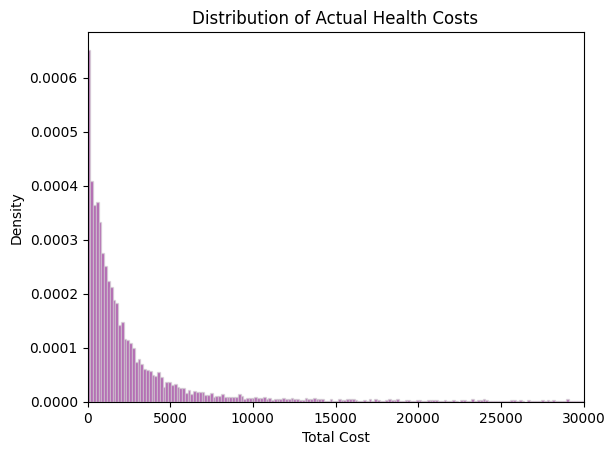

Calculated mean: 5077.69
Calculated median: 1414.40

99th percentile: 66864.14
95th percentile: 25627.60
90th percentile: 10296.09
70th percentile: 2806.88
50th percentile: 1414.40


In [232]:
import numpy as np
import matplotlib.pyplot as plt

compounding_effect = 1.1  # Probability should increase after each event
cost_growth = 1.07 # Subsequent health events cost more
num_simulations = 10000  # Number of simulations
num_steps = 52  # Number of steps per simulation (e.g., 52 weeks in a year)
cost_results = []  # List to store total costs for each simulation

for sim in range(num_simulations):
    total_cost = 0  # Total cost for the current simulation
    current_probability = np.random.choice(lognormal_occurence_samples) / 100  # Normalize to probability range (0, 1)
    cost_multiplier = 1  # Start with a cost multiplier of 1 for each simulation

    for step in range(num_steps):
        if np.random.rand() < current_probability:  # Check if a health event occurs
            cost = np.random.choice(lognormal_cost_samples) * cost_multiplier  # Apply the cost multiplier
            total_cost += cost  # Add the cost to the total

            # Increase the probability of the next event and the cost of the next event
            current_probability = min(1, current_probability * compounding_effect)  # Increase probability by 10%
            cost_multiplier *= cost_growth  # Double the cost of the next event
    
    cost_results.append(total_cost)  # Store the total cost for this simulation

# Step 6: Plot the distribution of actual health costs from all simulations
plt.hist(cost_results, bins=1000, density=True, alpha=0.6, color='purple', edgecolor="lightgray")
plt.title("Distribution of Actual Health Costs")
plt.xlabel("Total Cost")
plt.ylabel("Density")
plt.xlim(0, 30000)  # Limit x-axis range to better see distribution
plt.show()

# Print out statistics and percentiles
print(f"Calculated mean: {np.mean(cost_results):.2f}")
print(f"Calculated median: {np.median(cost_results):.2f}\n")

# Calculate and print specified percentiles
percentiles = [99, 95, 90, 70, 50]
percentile_values = np.percentile(cost_results, percentiles)

for p, value in zip(percentiles, percentile_values):
    print(f"{p}th percentile: {value:.2f}")


#### Possible check on distribution
https://meps.ahrq.gov/data_files/publications/st533/stat533.shtml

Table 1. Percentile of population ranked by spending and amount spent during the year\
2018 Expenditure Percentiles


| **Percentile of Population** | **Expenditure (\$)**   |
|------------------------------|------------------------|
| Top 1%                        | \$72,212 or more       |
| Top 5%                        | \$26,355 or more       |
| Top 10%                       | \$14,651 or more       |
| Top 30%                       | \$3,776 or more        |
| Top 50%                       | \$1,317 or more        |



#### Possible check on distribution
https://meps.ahrq.gov/data_files/publications/st533/stat533.shtml

Table 1. Percentile of population ranked by spending and amount spent during the year\
2018 Expenditure Percentiles


| **Percentile of Population** | **Expenditure (\$)**   |
|------------------------------|------------------------|
| Top 1%                        | \$72,212 or more       |
| Top 5%                        | \$26,355 or more       |
| Top 10%                       | \$14,651 or more       |
| Top 30%                       | \$3,776 or more        |
| Top 50%                       | \$1,317 or more        |



### Walk through an individual simulation (if desired)

In [234]:
import numpy as np

# Interactive simulation walkthrough function
def walk_through_simulation():
    # Initialize simulation variables
    total_cost = 0
    current_probability = np.random.choice(lognormal_occurence_samples) / 100  # Normalize to probability range (0, 1)
    cost_multiplier = 1  # Start with a cost multiplier of 1

    print(f"Starting Simulation (52 weeks)\n")
    print(f"Initial health event probability: {current_probability:.2f}")
    print(f"Initial cost multiplier: {cost_multiplier:.2f}\n")
    
    # Step through each week (step)
    for step in range(1, num_steps + 1):
        input(f"Press Enter to step into week {step}...")

        if np.random.rand() < current_probability:
            # Health event occurred
            cost = np.random.choice(lognormal_cost_samples) * cost_multiplier
            total_cost += cost
            print(f"Week {step}: Health event occurred! Cost: ${cost:.2f}")
            
            # Increase probability and cost multiplier
            current_probability = min(1, current_probability * compounding_effect)
            cost_multiplier *= cost_growth
        else:
            # No health event
            print(f"Week {step}: No health event occurred.")
        
        # Display current state after this step
        print(f"Updated health event probability: {current_probability:.2f}")
        print(f"Updated cost multiplier: {cost_multiplier:.2f}")
        print(f"Total accumulated cost so far: ${total_cost:.2f}\n")
    
    print("Simulation complete!")
    print(f"Final total cost after 52 weeks: ${total_cost:.2f}")

# To run the interactive walkthrough:
walk_through_simulation()


Starting Simulation (52 weeks)

Initial health event probability: 0.07
Initial cost multiplier: 1.00



Press Enter to step into week 1... 


Week 1: No health event occurred.
Updated health event probability: 0.07
Updated cost multiplier: 1.00
Total accumulated cost so far: $0.00



Press Enter to step into week 2... 


Week 2: No health event occurred.
Updated health event probability: 0.07
Updated cost multiplier: 1.00
Total accumulated cost so far: $0.00



Press Enter to step into week 3... 


Week 3: No health event occurred.
Updated health event probability: 0.07
Updated cost multiplier: 1.00
Total accumulated cost so far: $0.00



Press Enter to step into week 4... 


Week 4: No health event occurred.
Updated health event probability: 0.07
Updated cost multiplier: 1.00
Total accumulated cost so far: $0.00



Press Enter to step into week 5... 


Week 5: No health event occurred.
Updated health event probability: 0.07
Updated cost multiplier: 1.00
Total accumulated cost so far: $0.00



Press Enter to step into week 6... 


Week 6: No health event occurred.
Updated health event probability: 0.07
Updated cost multiplier: 1.00
Total accumulated cost so far: $0.00



Press Enter to step into week 7... 


Week 7: No health event occurred.
Updated health event probability: 0.07
Updated cost multiplier: 1.00
Total accumulated cost so far: $0.00



Press Enter to step into week 8... 


Week 8: No health event occurred.
Updated health event probability: 0.07
Updated cost multiplier: 1.00
Total accumulated cost so far: $0.00



Press Enter to step into week 9... 


Week 9: No health event occurred.
Updated health event probability: 0.07
Updated cost multiplier: 1.00
Total accumulated cost so far: $0.00



Press Enter to step into week 10... 


Week 10: No health event occurred.
Updated health event probability: 0.07
Updated cost multiplier: 1.00
Total accumulated cost so far: $0.00



Press Enter to step into week 11... 


Week 11: No health event occurred.
Updated health event probability: 0.07
Updated cost multiplier: 1.00
Total accumulated cost so far: $0.00



Press Enter to step into week 12... 


Week 12: No health event occurred.
Updated health event probability: 0.07
Updated cost multiplier: 1.00
Total accumulated cost so far: $0.00



Press Enter to step into week 13... 


Week 13: No health event occurred.
Updated health event probability: 0.07
Updated cost multiplier: 1.00
Total accumulated cost so far: $0.00



Press Enter to step into week 14... 


Week 14: No health event occurred.
Updated health event probability: 0.07
Updated cost multiplier: 1.00
Total accumulated cost so far: $0.00



Press Enter to step into week 15... 


Week 15: Health event occurred! Cost: $166.08
Updated health event probability: 0.07
Updated cost multiplier: 1.07
Total accumulated cost so far: $166.08



Press Enter to step into week 16... 


Week 16: No health event occurred.
Updated health event probability: 0.07
Updated cost multiplier: 1.07
Total accumulated cost so far: $166.08



Press Enter to step into week 17... 


Week 17: No health event occurred.
Updated health event probability: 0.07
Updated cost multiplier: 1.07
Total accumulated cost so far: $166.08



Press Enter to step into week 18... 


Week 18: No health event occurred.
Updated health event probability: 0.07
Updated cost multiplier: 1.07
Total accumulated cost so far: $166.08



Press Enter to step into week 19... 


Week 19: No health event occurred.
Updated health event probability: 0.07
Updated cost multiplier: 1.07
Total accumulated cost so far: $166.08



Press Enter to step into week 20... 


Week 20: No health event occurred.
Updated health event probability: 0.07
Updated cost multiplier: 1.07
Total accumulated cost so far: $166.08



Press Enter to step into week 21... 


Week 21: No health event occurred.
Updated health event probability: 0.07
Updated cost multiplier: 1.07
Total accumulated cost so far: $166.08



Press Enter to step into week 22... 


Week 22: No health event occurred.
Updated health event probability: 0.07
Updated cost multiplier: 1.07
Total accumulated cost so far: $166.08



Press Enter to step into week 23... 


Week 23: No health event occurred.
Updated health event probability: 0.07
Updated cost multiplier: 1.07
Total accumulated cost so far: $166.08



Press Enter to step into week 24... 


Week 24: No health event occurred.
Updated health event probability: 0.07
Updated cost multiplier: 1.07
Total accumulated cost so far: $166.08



Press Enter to step into week 25... 


Week 25: No health event occurred.
Updated health event probability: 0.07
Updated cost multiplier: 1.07
Total accumulated cost so far: $166.08



Press Enter to step into week 26... 


Week 26: No health event occurred.
Updated health event probability: 0.07
Updated cost multiplier: 1.07
Total accumulated cost so far: $166.08



Press Enter to step into week 27... 


Week 27: Health event occurred! Cost: $172.86
Updated health event probability: 0.08
Updated cost multiplier: 1.14
Total accumulated cost so far: $338.95



Press Enter to step into week 28... 


Week 28: No health event occurred.
Updated health event probability: 0.08
Updated cost multiplier: 1.14
Total accumulated cost so far: $338.95



Press Enter to step into week 29... 


Week 29: No health event occurred.
Updated health event probability: 0.08
Updated cost multiplier: 1.14
Total accumulated cost so far: $338.95



Press Enter to step into week 30... 


Week 30: No health event occurred.
Updated health event probability: 0.08
Updated cost multiplier: 1.14
Total accumulated cost so far: $338.95



Press Enter to step into week 31... 


Week 31: No health event occurred.
Updated health event probability: 0.08
Updated cost multiplier: 1.14
Total accumulated cost so far: $338.95



Press Enter to step into week 32... 


Week 32: No health event occurred.
Updated health event probability: 0.08
Updated cost multiplier: 1.14
Total accumulated cost so far: $338.95



Press Enter to step into week 33... 


Week 33: No health event occurred.
Updated health event probability: 0.08
Updated cost multiplier: 1.14
Total accumulated cost so far: $338.95



Press Enter to step into week 34... 


Week 34: No health event occurred.
Updated health event probability: 0.08
Updated cost multiplier: 1.14
Total accumulated cost so far: $338.95



Press Enter to step into week 35... 


Week 35: No health event occurred.
Updated health event probability: 0.08
Updated cost multiplier: 1.14
Total accumulated cost so far: $338.95



Press Enter to step into week 36... 


Week 36: No health event occurred.
Updated health event probability: 0.08
Updated cost multiplier: 1.14
Total accumulated cost so far: $338.95



Press Enter to step into week 37... 


Week 37: No health event occurred.
Updated health event probability: 0.08
Updated cost multiplier: 1.14
Total accumulated cost so far: $338.95



Press Enter to step into week 38... 


Week 38: No health event occurred.
Updated health event probability: 0.08
Updated cost multiplier: 1.14
Total accumulated cost so far: $338.95



Press Enter to step into week 39... 


Week 39: No health event occurred.
Updated health event probability: 0.08
Updated cost multiplier: 1.14
Total accumulated cost so far: $338.95



Press Enter to step into week 40... 


Week 40: No health event occurred.
Updated health event probability: 0.08
Updated cost multiplier: 1.14
Total accumulated cost so far: $338.95



Press Enter to step into week 41... 


Week 41: No health event occurred.
Updated health event probability: 0.08
Updated cost multiplier: 1.14
Total accumulated cost so far: $338.95



Press Enter to step into week 42... 


Week 42: No health event occurred.
Updated health event probability: 0.08
Updated cost multiplier: 1.14
Total accumulated cost so far: $338.95



Press Enter to step into week 43... 


Week 43: No health event occurred.
Updated health event probability: 0.08
Updated cost multiplier: 1.14
Total accumulated cost so far: $338.95



Press Enter to step into week 44... 


Week 44: Health event occurred! Cost: $93.25
Updated health event probability: 0.09
Updated cost multiplier: 1.23
Total accumulated cost so far: $432.19



Press Enter to step into week 45... 


Week 45: No health event occurred.
Updated health event probability: 0.09
Updated cost multiplier: 1.23
Total accumulated cost so far: $432.19



Press Enter to step into week 46... 


Week 46: No health event occurred.
Updated health event probability: 0.09
Updated cost multiplier: 1.23
Total accumulated cost so far: $432.19



Press Enter to step into week 47... 


Week 47: No health event occurred.
Updated health event probability: 0.09
Updated cost multiplier: 1.23
Total accumulated cost so far: $432.19



Press Enter to step into week 48... 


Week 48: No health event occurred.
Updated health event probability: 0.09
Updated cost multiplier: 1.23
Total accumulated cost so far: $432.19



Press Enter to step into week 49... 


Week 49: No health event occurred.
Updated health event probability: 0.09
Updated cost multiplier: 1.23
Total accumulated cost so far: $432.19



Press Enter to step into week 50... 


Week 50: No health event occurred.
Updated health event probability: 0.09
Updated cost multiplier: 1.23
Total accumulated cost so far: $432.19



Press Enter to step into week 51... 


Week 51: No health event occurred.
Updated health event probability: 0.09
Updated cost multiplier: 1.23
Total accumulated cost so far: $432.19



Press Enter to step into week 52... 


Week 52: Health event occurred! Cost: $1460.69
Updated health event probability: 0.10
Updated cost multiplier: 1.31
Total accumulated cost so far: $1892.89

Simulation complete!
Final total cost after 52 weeks: $1892.89
